In [66]:
import serial
ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/tty.usbmodem1411'
ser

Serial<id=0x1174eada0, open=False>(port='/dev/tty.usbmodem1411', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False)

In [67]:
# Ouverture connection au port série
ser.open()
ser.is_open

True

In [68]:
# Lecture et accumulation de 500 frames de données (temps, ax, ay, az, gx, gy, gz, mx, my, mz)
lines = []
for i in range(0,500):
    line = ser.readline()
    line = line.rstrip()
    lines.append(line)
print('Première ligne : ' + lines[0].decode('UTF8'))
# Fermeture connection port série
ser.flush()
ser.close()
ser.is_open

Première ligne : 3385701, 0.56, 1.83, -1.45, -73.29, -188.60, 92.68, 76.07, -61.67, -69.02


False

In [69]:
# Décodage des 500 frames
time0 = lines[0].decode('UTF8').split(',')[0]
times = []; axs = []; ays = []; azs = []; gxs = []; gys = []; gzs = []; mxs = []; mys = []; mzs = [];
for row in lines:
    time, ax, ay, az, gx, gy, gz, mx, my, mz = row.decode('UTF-8').split(',')
    times.append(int(time) - int(time0));
    axs.append(float(ax)); ays.append(float(ay)); azs.append(float(az));
    gxs.append(float(gx)); gys.append(float(gy)); gzs.append(float(gz));
    mxs.append(float(mx)); mys.append(float(my)); mzs.append(float(mz));

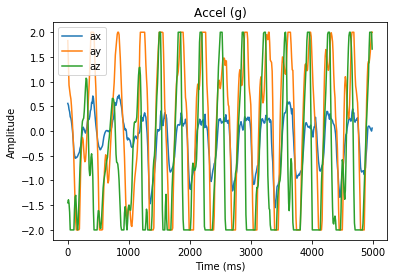

In [70]:
# Affichage des accélérations
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Accel (g)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.plot(times, axs, label = 'ax')
plt.plot(times, ays, label = 'ay')
plt.plot(times, azs, label = 'az')
plt.legend()
plt.show()

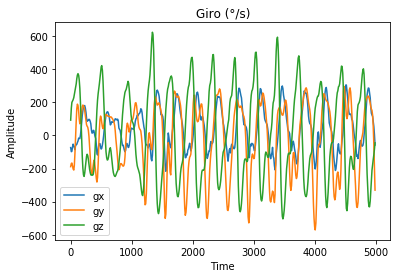

In [71]:
# Affichage des gyros
plt.figure(1)
plt.title('Giro (°/s)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(times, gxs, label = 'gx')
plt.plot(times, gys, label = 'gy')
plt.plot(times, gzs, label = 'gz')
plt.legend()
plt.show()

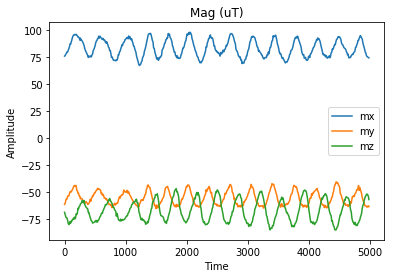

In [72]:
# Affichage des magnétos
plt.figure(1)
plt.title('Mag (uT)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(times, mxs, label = 'mx')
plt.plot(times, mys, label = 'my')
plt.plot(times, mzs, label = 'mz')
plt.legend()
plt.show()